**SECTION 1: BASIC STABLE DIFFUSION SETUP**

Goal: Get basic image generation working

In [ ]:
# Don't run locally
# %pip install diffusers transformers accelerate safetensors xformers pytorch
# import torch
# from diffusers import AutoPipelineForImage2Image
# from diffusers.utils import load_image, make_image_grid

# pipeline = AutoPipelineForImage2Image.from_pretrained(
#     "kandinsky-community/kandinsky-2-2-decoder", 
#     torch_dtype=torch.float16, 
#     use_safetensors=True
# )
# pipeline.enable_model_cpu_offload()
# pipeline.enable_xformers_memory_efficient_attention()

In [1]:
# LOCAL CPU DEVELOPMENT
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid

# Load the pipeline
pipeline = AutoPipelineForImage2Image.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder", 
    use_safetensors=True
)

pipeline = pipeline.to("cpu")

print("Pipeline loaded successfully on CPU!")
print(f"Device: {pipeline.device}")


Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Pipeline loaded successfully on CPU!
Device: cpu


**SECTION 2: BASIC IMAGE GENERATION**

Goal: Gnerate your first images

  0%|          | 0/25 [00:00<?, ?it/s]

/Users/heidyhernandez/.pyenv/versions/3.11.3/lib/python3.11/site-packages/diffusers/pipelines/kandinsky2_2/pipeline_kandinsky2_2_img2img.py:269: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(


  0%|          | 0/30 [00:00<?, ?it/s]

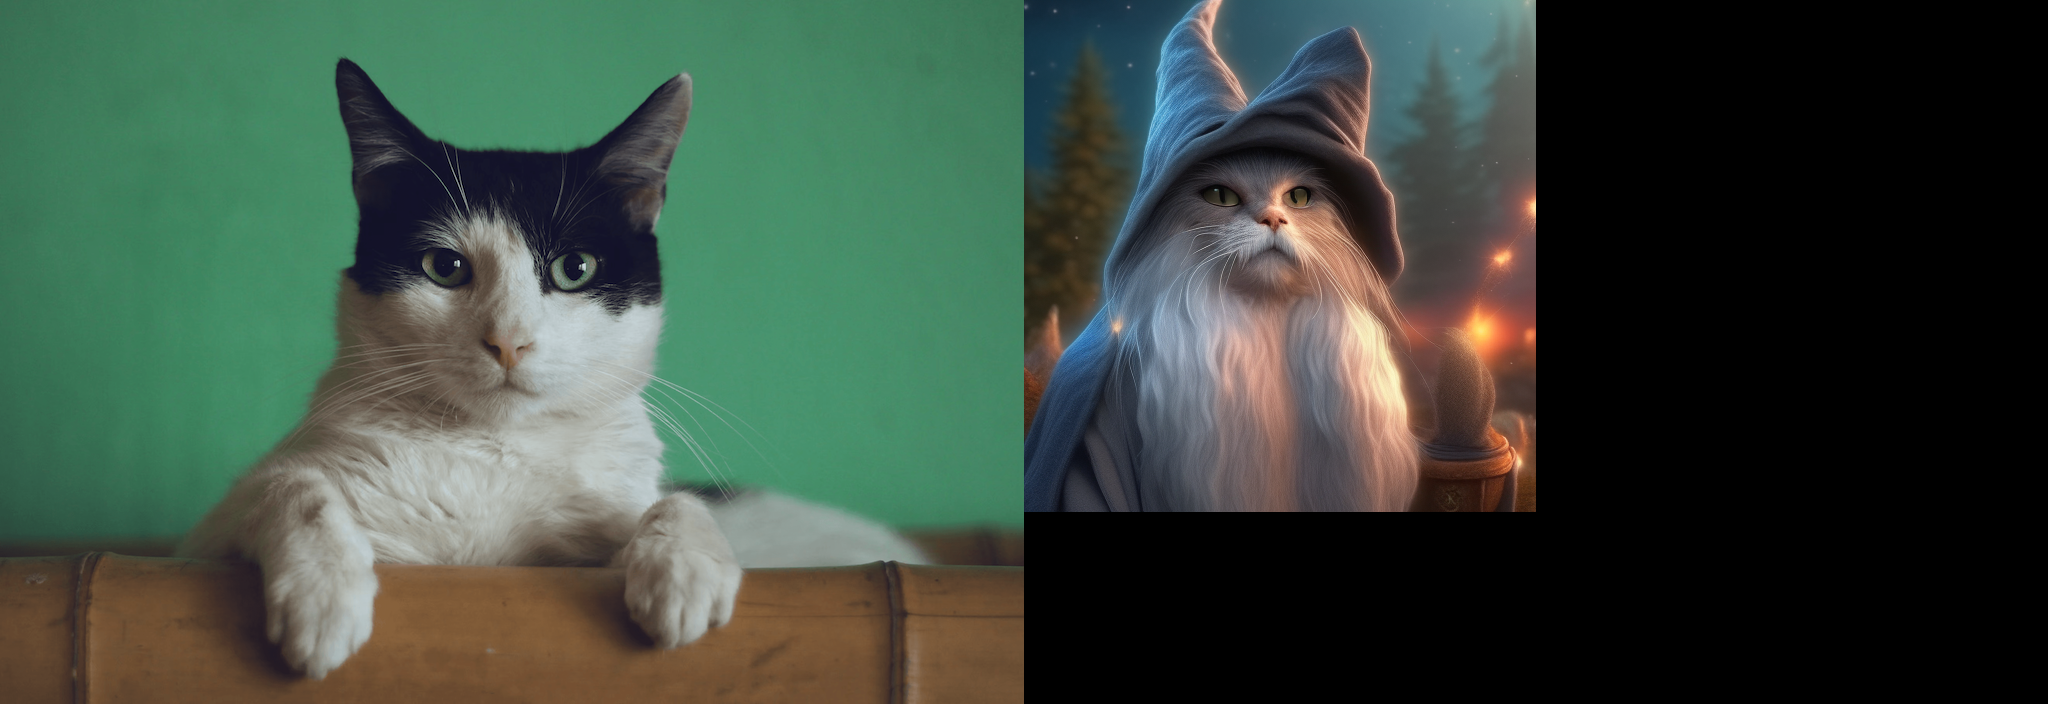

In [2]:
# simple prompt
init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/cat.png")
prompt = "cat wizard, gandalf, lord of the rings, detailed, fantasy, cute, adorable, Pixar, Disney, 8k"
image = pipeline(prompt, image=init_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)


**SECTION 3: BASIC LORA TRAINING**

Goal: Learn to fine-tune models

1. LoRA setup
2. Simple training loops
3. Basic fine-tuning

**SECTION 4: ADVANCED FEATURES**

Goal: Professional-level training

1. Complex training strategies
2. Style transfer
3. Advanced optimizations

# Model

### style prompting with Chain-of-Thought

Running the code block with different temperatures each time to get different outputs, with each time testing them 😏

In [ ]:
import os
from openai import OpenAI

client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))

def plan_style_prompt(content_hint: str, style_goal: str) -> str:
    system = (
        "You write concise style prompts for SDXL img2img. "
        "Return a single prompt that preserves content but changes style. "
        "Include medium, materials, palette, lighting, texture, and era. "
        "Avoid scene changes, extra objects, or composition changes."
    )
    user = f"""
Content summary: {content_hint}
Style goal: {style_goal}

Think step by step to choose medium, palette, lighting, texture, era, and artist references,
then produce one final prompt in one paragraph at the end under 'FINAL PROMPT:'.
"""
    r = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role":"system","content":system},{"role":"user","content":user}],
        temperature=0.7,
    )
    text = r.choices[0].message.content
    # simple parse
    final = text.split("FINAL PROMPT:")[-1].strip()
    return final

# Example
content_hint = "a portrait photo of a woman indoors, soft window light, neutral background"
style_goal = "turn this into an impressionist oil painting with visible brush strokes and vibrant colors"
prompt = plan_style_prompt(content_hint, style_goal)
print(prompt)

"An impressionist oil painting of a woman indoors, featuring vibrant colors and thick brush strokes, illuminated by soft, diffused window light against a neutral background, reminiscent of late 19th-century art."


## Trying out the model

slayy

Additionally, can provide examples of before and after iamges to try and improve product. If necessary, prompt chaining?
Are we fine tuning?

In [ ]:
#FINE TUNING

In [ ]:
%pip install diffusers transformers accelerate datasets
%pip install torch torchvision torchaudio

In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from PIL import Image
import os
import torch
from tqdm import tqdm

In [ ]:
#conform image dataset to desired size

def preprocess_images(input_dir, output_dir, target_size=(512, 512)):
    os.makedirs(output_dir, exist_ok=True)

    for file_name in os.listdir(input_dir):
        file_path = os.path.join(input_dir, file_name)
        if file_name.endswith(('.png', '.jpg', '.jpeg')):
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize(target_size)
                img.save(os.path.join(output_dir, file_name))
            except Exception as e:
                print(f"Error processing {file_name}: {e}")

input_dir = ...
output_dir = ...
preprocess_images(input_dir, output_dir)

In [ ]:
#example code of image augmentation. we can check albumentations for other augmentations
from albumentations import Compose, RandomCrop, HorizontalFlip, RandomBrightnessContrast
from albumentations.core.composition import OneOf
import cv2
import os

def augment_images(input_dir, output_dir, num_augmented=5):
    os.makedirs(output_dir, exist_ok=True)
    augmentations = Compose([
        RandomCrop(256, 256),
        HorizontalFlip(p=0.5),
        OneOf([
            RandomBrightnessContrast(p=0.2),
        ], p=0.3)
    ])

    for file_name in os.listdir(input_dir):
        file_path = os.path.join(input_dir, file_name)
        if file_name.endswith(('.png', '.jpg', '.jpeg')):
            img = cv2.imread(file_path)
            for i in range(num_augmented):
                augmented = augmentations(image=img)
                aug_img = augmented['image']
                cv2.imwrite(os.path.join(output_dir, f"{file_name.split('.')[0]}_aug_{i}.jpg"), aug_img)

input_dir = "processed_dataset"
output_dir = "augmented_dataset"
augment_images(input_dir, output_dir)

In [ ]:
#accelerate from huggingface for GPU optimization
from accelerate import Accelerator

accelerator = Accelerator()
pipe.enable_attention_slicing() #pipe is the stable diffusion model right?

In [ ]:
#create dataloaders
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load custom dataset
dataset = datasets.ImageFolder(root="OUR PATH", transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [ ]:
# MODEL SAVING AND LOADING
import os
from datetime import datetime

def save_lora_model(pipe, save_dir, model_name=None):
    """Save LoRA weights and configuration"""
    if model_name is None:
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        model_name = f"style_lora_{timestamp}"
    
    save_path = os.path.join(save_dir, model_name)
    os.makedirs(save_path, exist_ok=True)
    
    # Save LoRA weights
    pipe.unet.save_pretrained(save_path)
    
    # Save configuration
    config = {
        "model_type": "stable-diffusion-xl-lora",
        "base_model": "stabilityai/stable-diffusion-xl-base-1.0",
        "lora_config": {
            "r": 16,
            "lora_alpha": 32,
            "target_modules": ["to_k", "to_q", "to_v", "to_out.0"],
            "lora_dropout": 0.1
        },
        "training_args": training_args,
        "timestamp": datetime.now().isoformat()
    }
    
    with open(os.path.join(save_path, "config.json"), "w") as f:
        json.dump(config, f, indent=2)
    
    print(f"Model saved to: {save_path}")
    return save_path

def load_lora_model(model_path, base_model_id="stabilityai/stable-diffusion-xl-base-1.0"):
    """Load a LoRA fine-tuned model"""
    from peft import PeftModel
    
    # Load base pipeline
    base_pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
        base_model_id,
        torch_dtype=torch.float16,
        use_safetensors=True,
    ).to(device)
    
    # Load LoRA weights
    base_pipe.unet = PeftModel.from_pretrained(base_pipe.unet, model_path)
    
    print(f"Loaded LoRA model from: {model_path}")
    return base_pipe

def create_inference_pipeline(lora_model_path):
    """Create an optimized inference pipeline"""
    pipe = load_lora_model(lora_model_path)
    
    # Optimizations for inference
    pipe.enable_vae_slicing()
    pipe.enable_vae_tiling()
    pipe.enable_attention_slicing()
    pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
    
    return pipe

# Style transfer function using fine-tuned model
def style_transfer_with_finetuned_model(
    pipe, 
    input_image, 
    style_prompt, 
    strength=0.6, 
    guidance_scale=7.5, 
    num_inference_steps=50,
    seed=None
):
    """Generate styled image using fine-tuned model"""
    if seed is not None:
        generator = torch.Generator(device=device).manual_seed(seed)
    else:
        generator = None
    
    # Prepare image
    if isinstance(input_image, str):
        input_image = Image.open(input_image).convert("RGB")
    
    input_image = prepare(input_image, 768)  # Use the prepare function from earlier
    
    # Generate styled image
    result = pipe(
        prompt=style_prompt,
        negative_prompt="blurry, washed out, deformed, extra digits, low detail, artifacts",
        image=input_image,
        strength=strength,
        guidance_scale=guidance_scale,
        num_inference_steps=num_inference_steps,
        generator=generator,
    )
    
    return result.images[0]

# Example usage:
# After training:
# save_path = save_lora_model(pipe, "./models", "impressionist_style_v1")

# For inference:
# inference_pipe = create_inference_pipeline("./models/impressionist_style_v1")
# styled_image = style_transfer_with_finetuned_model(
#     inference_pipe, 
#     "path/to/input/image.jpg", 
#     "impressionist oil painting with visible brush strokes"
# )


In [ ]:
# ADVANCED TECHNIQUES FOR STYLE FINETUNING

# 1. PROGRESSIVE TRAINING STRATEGY
def progressive_training_schedule():
    """Progressive training with different strengths and learning rates"""
    schedules = [
        {"epochs": 3, "lr": 1e-5, "strength_range": (0.3, 0.5)},  # Gentle start
        {"epochs": 4, "lr": 5e-5, "strength_range": (0.4, 0.7)},  # Medium intensity
        {"epochs": 3, "lr": 2e-5, "strength_range": (0.5, 0.8)},  # High intensity
    ]
    return schedules

# 2. STYLE CONSISTENCY LOSS
class StyleConsistencyLoss(torch.nn.Module):
    """Custom loss to maintain style consistency"""
    def __init__(self, style_weight=0.1):
        super().__init__()
        self.style_weight = style_weight
        self.mse_loss = torch.nn.MSELoss()
        
    def forward(self, noise_pred, target_noise, style_features=None):
        # Standard denoising loss
        denoising_loss = self.mse_loss(noise_pred, target_noise)
        
        # Style consistency loss (if style features provided)
        if style_features is not None:
            # Extract features from predicted noise
            pred_features = self.extract_style_features(noise_pred)
            style_loss = self.mse_loss(pred_features, style_features)
            return denoising_loss + self.style_weight * style_loss
        
        return denoising_loss
    
    def extract_style_features(self, x):
        # Simplified style feature extraction (Gram matrix)
        b, c, h, w = x.size()
        features = x.view(b, c, h * w)
        gram = torch.bmm(features, features.transpose(1, 2))
        return gram / (c * h * w)

# 3. MIXED PRECISION TRAINING
from torch.cuda.amp import autocast, GradScaler

def train_with_mixed_precision(pipe, dataloader, training_args):
    """Training with automatic mixed precision for better performance"""
    scaler = GradScaler()
    
    for epoch in range(training_args["num_train_epochs"]):
        for batch_idx, (images, prompts) in enumerate(dataloader):
            with autocast():
                # Forward pass with mixed precision
                loss = train_step(batch, prompts)
                loss = loss / training_args["gradient_accumulation_steps"]
            
            # Backward pass with gradient scaling
            scaler.scale(loss).backward()
            
            if (batch_idx + 1) % training_args["gradient_accumulation_steps"] == 0:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(pipe.unet.parameters(), training_args["max_grad_norm"])
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()

# 4. CURRICULUM LEARNING FOR STYLE TRANSFER
class StyleCurriculumSampler:
    """Curriculum learning: start with easy style transfers, progress to harder ones"""
    def __init__(self, dataset, difficulty_scores):
        self.dataset = dataset
        self.difficulty_scores = difficulty_scores
        self.current_difficulty = 0.3  # Start easy
        
    def get_batch(self, batch_size):
        # Sample based on current difficulty threshold
        valid_indices = [i for i, score in enumerate(self.difficulty_scores) 
                        if score <= self.current_difficulty]
        
        if len(valid_indices) < batch_size:
            valid_indices = list(range(len(self.dataset)))
        
        indices = np.random.choice(valid_indices, batch_size, replace=False)
        return [self.dataset[i] for i in indices]
    
    def update_difficulty(self, epoch, total_epochs):
        # Gradually increase difficulty
        self.current_difficulty = 0.3 + 0.7 * (epoch / total_epochs)

# 5. STYLE INTERPOLATION FOR DATA AUGMENTATION
def create_style_interpolation_dataset(base_images, style_prompts, num_interpolations=3):
    """Create interpolated style prompts for data augmentation"""
    interpolated_data = []
    
    for img in base_images:
        for i in range(len(style_prompts)):
            for j in range(i+1, len(style_prompts)):
                # Create interpolated prompts
                for alpha in np.linspace(0.2, 0.8, num_interpolations):
                    interpolated_prompt = f"blend of {style_prompts[i]} ({alpha:.1f}) and {style_prompts[j]} ({1-alpha:.1f})"
                    interpolated_data.append((img, interpolated_prompt))
    
    return interpolated_data

# 6. QUALITY-AWARE TRAINING
class QualityAwareTraining:
    """Filter training samples based on quality metrics"""
    def __init__(self, quality_threshold=0.7):
        self.quality_threshold = quality_threshold
        self.clip_model, _ = clip.load("ViT-B/32", device="cuda")
    
    def assess_quality(self, image, prompt):
        """Assess quality of image-prompt pair"""
        with torch.no_grad():
            image_features = self.clip_model.encode_image(image)
            text_features = self.clip_model.encode_text(clip.tokenize([prompt]).to("cuda"))
            similarity = torch.cosine_similarity(image_features, text_features).item()
        return similarity
    
    def filter_batch(self, batch):
        """Filter batch based on quality"""
        filtered_batch = []
        for img, prompt in batch:
            if self.assess_quality(img, prompt) > self.quality_threshold:
                filtered_batch.append((img, prompt))
        return filtered_batch

# 7. STYLE TRANSFER BEST PRACTICES SUMMARY
STYLE_FINETUNING_TIPS = """
🎨 STYLE FINETUNING BEST PRACTICES:

1. **Data Preparation:**
   - Use high-quality, diverse style examples (500-2000 images minimum)
   - Ensure consistent style characteristics across dataset
   - Apply appropriate data augmentation (but preserve style elements)

2. **Training Strategy:**
   - Start with LoRA (r=16-32) for efficient training
   - Use progressive training: easy → hard style transfers
   - Implement curriculum learning for complex styles

3. **Hyperparameters:**
   - Learning rate: 5e-5 to 1e-4 for LoRA
   - Batch size: 4-8 (with gradient accumulation)
   - Training epochs: 10-20 (monitor for overfitting)

4. **Evaluation:**
   - Use CLIP similarity for style-prompt alignment
   - Calculate FID for image quality
   - Manual evaluation for artistic quality

5. **Memory Optimization:**
   - Enable gradient checkpointing
   - Use mixed precision training
   - Apply VAE slicing and tiling

6. **Style Consistency:**
   - Use consistent prompting templates
   - Implement style consistency loss
   - Validate on diverse test images

7. **Deployment:**
   - Save LoRA weights separately from base model
   - Use optimized inference pipeline
   - Consider model quantization for production
"""

print(STYLE_FINETUNING_TIPS)


In [ ]:
#Evaluation: FID?